In [1]:
import sys
sys.path.insert(1, '/Users/jeanettemumford/Dropbox/Research/Projects/RT_sims/Code')
from functions import *
import seaborn as sns
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import json

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

/Users/jeanettemumford/.pyenv/versions/3.8.5/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [2]:
nsub = 100
n_trials = 80
repetition_time = 1
mu_grinband_shift = 638
inv_lambda_grinband_shift = 699
sigma_grinband_shift = 103
#mu_expnorm = mu_grinband_shift
#lam_expnorm = 1 / inv_lambda_grinband_shift
#sigma_expnorm = sigma_grinband_shift
#Stroop settings
mu_expnorm = 530
lam_expnorm = 1 / 160
sigma_expnorm = 77
max_rt = 8000
min_rt = 50
event_duration = .1  
center_rt = False
hp_filter = True
ISI_min = 3
ISI_max = 6


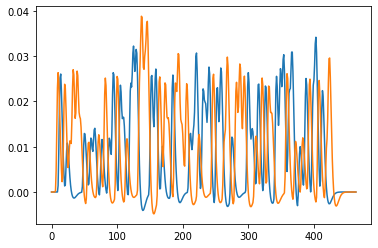

In [3]:
# Plot one to ensure the scan_duration is long enough
rt_diff_s = .3
regs, mns = make_regressors_two_trial_types(n_trials,
                                    repetition_time, mu_expnorm,
                                    lam_expnorm, sigma_expnorm,
                                    max_rt, min_rt, event_duration, 
                                    ISI_min, ISI_max, center_rt, 
                                    rt_diff_s)
                                    
plt.plot(regs['stim1_random'])
plt.plot(regs['stim2_random'])
plt.show()


In [4]:
rt_diff_s = 0
beta_scales_yes = np.array([1.05, 1.05])
beta_scales_no = np.array([.85, .85])
win_sub_noise_sd={'dv_scales_yes': .8, 'dv_scales_no': .09}
btwn_sub_noise_sd={'dv_scales_yes': .65, 'dv_scales_no': .6}

In [5]:
# Within-subject effect size
nsim = 500
win_sub_eff_size = est_within_sub_eff_size_2stim(n_trials, repetition_time,
                                  mu_expnorm, lam_expnorm, 
                                  sigma_expnorm, max_rt, min_rt, 
                                  event_duration, ISI_min, ISI_max,
                                  win_sub_noise_sd,
                                  beta_scales_yes,
                                  beta_scales_no,
                                  center_rt, rt_diff_s, nsim)

In [6]:
print(win_sub_eff_size)

{'blocked': {'beta1_scales_yes': {'eff_size_cor': 0.056587793176816885}, 'beta2_scales_yes': {'eff_size_cor': 0.05776098289293715}, 'beta1_scales_no': {'eff_size_cor': 0.06030874835069966}, 'beta2_scales_no': {'eff_size_cor': 0.060731170421796474}}, 'random': {'beta1_scales_yes': {'eff_size_cor': 0.057350862206688676}, 'beta2_scales_yes': {'eff_size_cor': 0.05401180077717568}, 'beta1_scales_no': {'eff_size_cor': 0.06322695399565911}, 'beta2_scales_no': {'eff_size_cor': 0.06324371040797554}}}


In [7]:
# Group Cohen's D (check diff for power settings)
nsim = 1000
rt_diff_s = 0
beta_scales_yes = np.array([1.05, 1.30])
beta_scales_no = np.array([.85, 1.20])
cohens_d_check_beta_diff = est_group_cohen_d(n_trials,  repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, 
              win_sub_noise_sd,
              btwn_sub_noise_sd,
              beta_scales_yes, 
              beta_scales_no, 
              center_rt, 
              rt_diff_s, nsim)

In [8]:
print('correct models')
dv_types = ['dv_scales_yes', 'dv_scales_no']
mod_type = ['Two stimulus types, 2 RT dur only', 'Two stimulus types, no RT' ]
con_type = ['beta1', 'diff']
stim_type = ['blocked', 'random']
for cur_con in con_type:
    print("")
    print(cur_con)
    for cur_stim in stim_type:
        print(cur_stim)
        for i in range(2):
          val = round(cohens_d_check_beta_diff[cur_stim][dv_types[i]][mod_type[i]][cur_con]['cohens_d'], 3)
          print(f'{dv_types[i]}, {mod_type[i]} = {val}')
print("")
print('wrong models')
dv_types = ['dv_scales_yes', 'dv_scales_no']
mod_type = ['Two stimulus types, no RT', 'Two stimulus types, 2 RT dur only']
for cur_con in con_type:
    print("")
    print(cur_con)
    for cur_stim in stim_type:
        print(cur_stim)
        for i in range(2):
          val = round(cohens_d_check_beta_diff[cur_stim][dv_types[i]][mod_type[i]][cur_con]['cohens_d'], 3)
          print(f'{dv_types[i]}, {mod_type[i]} = {val}')

correct models

beta1
blocked
dv_scales_yes, Two stimulus types, 2 RT dur only = 0.941
dv_scales_no, Two stimulus types, no RT = 0.945
random
dv_scales_yes, Two stimulus types, 2 RT dur only = 0.873
dv_scales_no, Two stimulus types, no RT = 0.928

diff
blocked
dv_scales_yes, Two stimulus types, 2 RT dur only = 0.219
dv_scales_no, Two stimulus types, no RT = 0.358
random
dv_scales_yes, Two stimulus types, 2 RT dur only = 0.219
dv_scales_no, Two stimulus types, no RT = 0.385

wrong models

beta1
blocked
dv_scales_yes, Two stimulus types, no RT = 0.507
dv_scales_no, Two stimulus types, 2 RT dur only = 0.529
random
dv_scales_yes, Two stimulus types, no RT = 0.481
dv_scales_no, Two stimulus types, 2 RT dur only = 0.506

diff
blocked
dv_scales_yes, Two stimulus types, no RT = 0.219
dv_scales_no, Two stimulus types, 2 RT dur only = 0.34
random
dv_scales_yes, Two stimulus types, no RT = 0.225
dv_scales_no, Two stimulus types, 2 RT dur only = 0.359


In [9]:
# Check "wrong model" for RT expectations
nsim = 1000
rt_diff_s = 0.3
beta_scales_yes = np.array([1.05, 1.05])
beta_scales_no = np.array([.85, .85])
cohens_d_rt_check = est_group_cohen_d(n_trials,  repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, 
              win_sub_noise_sd,
              btwn_sub_noise_sd,
              beta_scales_yes, 
              beta_scales_no, 
              center_rt, 
              rt_diff_s, nsim)

In [10]:
print('correct models')
dv_types = ['dv_scales_yes', 'dv_scales_no']
mod_type = ['Two stimulus types, 2 RT dur only', 'Two stimulus types, no RT' ]
con_type = ['diff']
stim_type = ['blocked', 'random']
for cur_con in con_type:
    print("")
    print(cur_con)
    for cur_stim in stim_type:
        print(cur_stim)
        for i in range(2):
          val = round(cohens_d_rt_check[cur_stim][dv_types[i]][mod_type[i]][cur_con]['cohens_d'], 3)
          print(f'{dv_types[i]}, {mod_type[i]} = {val}')
print("")
print('wrong models')
dv_types = ['dv_scales_yes', 'dv_scales_no']
mod_type = ['Two stimulus types, no RT', 'Two stimulus types, 2 RT dur only']
for cur_con in con_type:
    print("")
    print(cur_con)
    for cur_stim in stim_type:
        print(cur_stim)
        for i in range(2):
          val = round(cohens_d_rt_check[cur_stim][dv_types[i]][mod_type[i]][cur_con]['cohens_d'], 3)
          print(f'{dv_types[i]}, {mod_type[i]} = {val}')

correct models

diff
blocked
dv_scales_yes, Two stimulus types, 2 RT dur only = 0.08
dv_scales_no, Two stimulus types, no RT = 0.03
random
dv_scales_yes, Two stimulus types, 2 RT dur only = -0.041
dv_scales_no, Two stimulus types, no RT = 0.059

wrong models

diff
blocked
dv_scales_yes, Two stimulus types, no RT = 0.414
dv_scales_no, Two stimulus types, 2 RT dur only = -0.196
random
dv_scales_yes, Two stimulus types, no RT = 0.298
dv_scales_no, Two stimulus types, 2 RT dur only = -0.129


In [11]:
# SD ratio
nsim = 1000
rt_diff_s = 0
sd_ratio_out_beta_diff = est_var_ratio_2stim(n_trials, repetition_time, mu_expnorm,
              lam_expnorm, sigma_expnorm, max_rt, 
              min_rt, event_duration, ISI_min, ISI_max, 
              win_sub_noise_sd,
              btwn_sub_noise_sd,
              center_rt, 
              rt_diff_s, nsim)

In [12]:
dv_type = ['dv_scales_yes', 'dv_scales_no']
model_type = ['Two stimulus types, 2 RT dur only', 'Two stimulus types, no RT']
stim_type = ['blocked', 'random']

for i in range(2):
    print("")
    print(f'{dv_type[i]}, {model_type[i]}')
    for cur_stim_type in stim_type:
        print(cur_stim_type)
        print(sd_ratio_out_beta_diff[dv_type[i]][cur_stim_type][model_type[i]]['sd_total_div_sd_win_beta_diff'])



dv_scales_yes, Two stimulus types, 2 RT dur only
blocked
[1.88708235]
random
[1.67081861]

dv_scales_no, Two stimulus types, no RT
blocked
[2.28181262]
random
[2.00036475]
